In [101]:
import pandas as pd
import urllib.request


data = pd.read_csv('../../news/scraping_result/en/2017_up2/2017_up2_Coindesk.csv', error_bad_lines=False)
data = data.append(pd.read_csv('../../news/scraping_result/en/2017_up2/2017_up2_Cointelegraph.csv', error_bad_lines=False))
data = data.append(pd.read_csv('../../news/scraping_result/en/2017_up2/2017_up2_Forbes.csv', error_bad_lines=False))



In [102]:
text = data[['main article']]
text['main article'] = text.apply(lambda row: row['main article'].replace("/"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("-"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("—"," "), axis=1)
#text['main article'] = text.apply(lambda row: row['main article'].replace("",""), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("*"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("…"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("\\"," "), axis=1)



/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [103]:
import nltk
text['main article'] = text.apply(lambda row: nltk.word_tokenize(row['main article']), axis=1)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [104]:
# 소문자 적용 , - 문자 삭제
text['main article'] = text['main article'].apply(lambda x : [word.lower().replace("-","") for word in x])
# 공백문자 삭제
text['main article'] = text['main article'].apply(lambda x : [word for word in x if word])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [105]:
from nltk.tag import pos_tag

text['pos tag'] = text.apply(lambda row: pos_tag(row['main article']), axis=1)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [106]:
# 불용어 품사 제거
text['main article'] = text['pos tag'].apply(lambda x: [word[0] for word in x if word[1] not in ('CC','CD','DT','EX','IN','LS','MD','PRP','PRP$','RB','TO','UH','WDT','WP','WP$','WRB')])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [107]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
text['main article'] = text['main article'].apply(lambda x: [word for word in x if word not in (stop)])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [108]:
import csv
stopword_list =[]
f = open('../../stopword/stop_en.txt', 'r')
reader = csv.reader(f)
for row in reader:
    #print(row[0])
    stopword_list.append(row[0])
    #pass
f.close()

text['main article'] = text['main article'].apply(lambda x: [word for word in x if word not in stopword_list])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [109]:
import re
pattern=re.compile(r'\.')
print(pattern.search('abc.de'))

text['main article'] = text['main article'].apply(lambda x: [word for word in x if pattern.search(word)== None])

<re.Match object; span=(3, 4), match='.'>


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [110]:
number_pattern=re.compile(r'[0-9]\,[0-9]')
text['main article'] = text['main article'].apply(lambda x: [word for word in x if number_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [111]:
native_number_pattern=re.compile(r'[0-9]')
text['main article'] = text['main article'].apply(lambda x: [word for word in x if native_number_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [112]:
star_pattern=re.compile(r'[a-z0-9*]\*[a-z0-9*]')
text['main article'] = text['main article'].apply(lambda x: [word for word in x if star_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [113]:
from nltk.stem import WordNetLemmatizer
text['main article'] = text['main article'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x]) # 동사 
text['main article'] = text['main article'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='a') for word in x]) # 형용사
text['main article'] = text['main article'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='n') for word in x]) # 명사
text['main article'] = text['main article'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='r') for word in x]) # 부사
#print(text)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [114]:
tokenized_doc = text['main article'].apply(lambda x: [word for word in x if len(word) > 3])
#print(tokenized_doc)

In [115]:
article_contents = tokenized_doc.values.tolist()

In [116]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

In [117]:
tokenized_doc_tfidf = tokenized_doc.apply(lambda x : ' '.join(x))

In [118]:
article_contents_tfidf = tokenized_doc_tfidf.values.tolist()

In [119]:
vectorizer = TfidfVectorizer()
sp_matrix = vectorizer.fit_transform([ " ".join(article_contents_tfidf) ])

In [120]:
word2id = defaultdict(lambda: 0)

In [121]:
for idx, feature in enumerate(vectorizer.get_feature_names()):
    word2id[feature] = idx

In [122]:
tf_idf_result = []
token_list = []
for i, sent in enumerate([" ".join(article_contents_tfidf)]):
    for token in sent.split() :
        if token not in token_list :
            temp=[]
            temp.append(token)
            temp.append(sp_matrix[i, word2id[token]])
            token_list.append(token)
            tf_idf_result.append(temp)

In [123]:
len(tf_idf_result)

13239

In [124]:
tf_idf_value =[]
for tf_idf_element in tf_idf_result :
    tf_idf_value.append(tf_idf_element[1])
print(len(tf_idf_value))  ## tf-idf 값을 배열에 담음

13239


In [125]:
from gensim import corpora
tokenized_doc = [d.split() for d in token_list]
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) 

[(1, 1)]


In [126]:
import gensim
NUM_TOPICS = 4 #20개의 토픽, k=20
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=50) 
# passes is similar with epoch , iterarion : loop per document
topics = ldamodel.print_topics(num_words=8)
for topic in topics:
    print(topic)

(0, '0.000*"rainmaker" + 0.000*"glare" + 0.000*"deuce" + 0.000*"behzad" + 0.000*"appetizer" + 0.000*"buyersthe" + 0.000*"scotch" + 0.000*"vend"')
(1, '0.000*"naghadeh" + 0.000*"persiangig" + 0.000*"morality" + 0.000*"sexism" + 0.000*"hacktivist" + 0.000*"logins" + 0.000*"sect" + 0.000*"crowdstrike"')
(2, '0.000*"cibc" + 0.000*"appsservices" + 0.000*"stabilise" + 0.000*"biyani" + 0.000*"incite" + 0.000*"malaise" + 0.000*"starbase" + 0.000*"lydiancoinltd"')
(3, '0.000*"inconsiderable" + 0.000*"globalthe" + 0.000*"tegmark" + 0.000*"laissez" + 0.000*"throne" + 0.000*"fivefold" + 0.000*"hiatus" + 0.000*"massesmore"')


In [127]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [128]:
sentences = article_contents

In [129]:
from gensim.models import Word2Vec

In [130]:
model = Word2Vec(sentences, min_count=1)

In [131]:
len(model.wv.vocab)

13239

In [132]:
X = model[model.wv.vocab]

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [133]:
from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=4
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
#kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.euclidean_distance, repeats=25)
#euclidean_distance
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
#print(X)
#print(assigned_clusters)

In [134]:
import pandas as pd
import numpy as np
temp_heder = ['raw_data','word','cluster','centroid','distance','tfidf','score','closer#']
temp_cluster_result = pd.DataFrame(columns=temp_heder)

In [135]:
temp_cluster_result['word'] = list(model.wv.vocab)

In [136]:
temp_cluster_result['cluster'] = assigned_clusters

In [137]:
temp_cluster_result['raw_data'] = X.tolist()

In [138]:
#temp_cluster_result['raw_data']
temp_cluster_result['centroid'] = temp_cluster_result['cluster'].apply(lambda x : kclusterer.means()[x])

In [139]:
from sklearn.metrics import pairwise_distances

In [140]:
cosine_centroid_list = []
for cosine_centroid in temp_cluster_result['centroid'] :
    cosine_centroid_list.append(cosine_centroid.tolist())

In [141]:
len(cosine_centroid_list)

13239

In [142]:
temp_distance = pairwise_distances(X,cosine_centroid_list, metric='cosine')

In [143]:
sum(temp_distance[3])

253.44821877566872

In [144]:
import scipy.spatial.distance as dist

In [145]:
dist.cosine(X[0],cosine_centroid_list[0])

0.0006952101673124433

In [146]:
dist.euclidean(X[0],cosine_centroid_list[0])

4.087152723473634

In [147]:
temp_cluster_result['distance'] = temp_cluster_result.apply(lambda x : dist.cosine(x.raw_data,x.centroid),axis=1)

In [148]:
temp_cluster_result['tfidf'] = tf_idf_value
temp_cluster_result['score'] = temp_cluster_result.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result

In [160]:
temp_cluster_result[temp_cluster_result['cluster']==0].sort_values(by=['score']).head(30)  # 비즈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
158,"[0.24082043766975403, 0.7323383688926697, -0.1...",company,0,"[0.028899947, 0.0812136, -0.019630997, -0.0528...",0.006696,0.114560,0.892135,NaN
543,"[0.2800453007221222, 0.678719162940979, -0.181...",people,0,"[0.028899947, 0.0812136, -0.019630997, -0.0528...",0.004849,0.093397,0.911452,NaN
112,"[0.29335731267929077, 0.5742276310920715, -0.1...",money,0,"[0.028899947, 0.0812136, -0.019630997, -0.0528...",0.013596,0.096477,0.917119,NaN
148,"[0.23828808963298798, 0.6957380771636963, -0.1...",take,0,"[0.028899947, 0.0812136, -0.019630997, -0.0528...",0.001978,0.078096,0.923882,NaN
424,"[0.2734962999820709, 0.7116774320602417, -0.17...",many,0,"[0.028899947, 0.0812136, -0.019630997, -0.0528...",0.001193,0.071538,0.929655,NaN
11,"[0.2936371862888336, 0.6807423830032349, -0.15...",come,0,"[0.028899947, 0.0812136, -0.019630997, -0.0528...",0.005057,0.064583,0.940474,NaN
399,"[0.3019128441810608, 0.6808121800422668, -0.17...",think,0,"[0.028899947, 0.0812136, -0.019630997, -0.0528...",0.004612,0.060211,0.944401,NaN
353,"[0.30496343970298767, 0.7297062873840332, -0.2...",good,0,"[0.028899947, 0.0812136, -0.019630997, -0.0528...",0.001478,0.054846,0.946632,NaN
1180,"[0.17684324085712433, 0.7999944090843201, -0.2...",base,0,"[0.028899947, 0.0812136, -0.019630997, -0.0528...",0.008110,0.060807,0.947303,NaN
2,"[0.29256248474121094, 0.5887260437011719, -0.2...",world,0,"[0.028899947, 0.0812136, -0.019630997, -0.0528...",0.018366,0.069253,0.949113,NaN


In [150]:
temp_cluster_result[temp_cluster_result['cluster']==1].sort_values(by=['score']).head(30)  # 가격 거래소 돈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
31,"[0.2565789520740509, 0.751168429851532, -0.113...",bitcoin,1,"[0.023835145, 0.06366164, -0.014105163, -0.043...",0.036180,0.561773,0.474407,NaN
5,"[0.3298734426498413, 0.5106420516967773, -0.19...",market,1,"[0.023835145, 0.06366164, -0.014105163, -0.043...",0.017454,0.184310,0.833144,NaN
4,"[0.2309841513633728, 0.5908991694450378, -0.18...",cryptocurrency,1,"[0.023835145, 0.06366164, -0.014105163, -0.043...",0.007526,0.140692,0.866835,NaN
33,"[0.3404810130596161, 0.6137174367904663, -0.12...",year,1,"[0.023835145, 0.06366164, -0.014105163, -0.043...",0.014183,0.115256,0.898927,NaN
21,"[0.26638925075531006, 0.792738139629364, -0.16...",time,1,"[0.023835145, 0.06366164, -0.014105163, -0.043...",0.018285,0.114063,0.904221,NaN
12,"[0.18338803946971893, 0.4824332296848297, -0.1...",exchange,1,"[0.023835145, 0.06366164, -0.014105163, -0.043...",0.036299,0.122310,0.913989,NaN
15,"[0.17003978788852692, 0.5664941072463989, -0.2...",trade,1,"[0.023835145, 0.06366164, -0.014105163, -0.043...",0.034382,0.117740,0.916642,NaN
114,"[0.324762761592865, 0.5453559756278992, -0.135...",investor,1,"[0.023835145, 0.06366164, -0.014105163, -0.043...",0.011979,0.094689,0.917290,NaN
41,"[0.32530784606933594, 0.5895108580589294, -0.1...",value,1,"[0.023835145, 0.06366164, -0.014105163, -0.043...",0.017700,0.096080,0.921620,NaN
42,"[0.24348832666873932, 0.6029520630836487, -0.1...",cryptocurrencies,1,"[0.023835145, 0.06366164, -0.014105163, -0.043...",0.006737,0.074519,0.932218,NaN


In [151]:
temp_cluster_result[temp_cluster_result['cluster']==2].sort_values(by=['score']).head(40)   # 기술

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
810,"[0.1708114743232727, 1.013128399848938, -0.322...",blockchain,2,"[0.015377185, 0.057022654, -0.013691283, -0.03...",0.041628,0.200505,0.841123,NaN
145,"[0.24905332922935486, 0.7872371077537537, -0.1...",make,2,"[0.015377185, 0.057022654, -0.013691283, -0.03...",0.002464,0.119429,0.883035,NaN
170,"[0.17137767374515533, 0.9536891579627991, -0.2...",user,2,"[0.015377185, 0.057022654, -0.013691283, -0.03...",0.006227,0.083064,0.923164,NaN
354,"[0.18211211264133453, 0.9722448587417603, -0.3...",technology,2,"[0.015377185, 0.057022654, -0.013691283, -0.03...",0.031200,0.098961,0.932239,NaN
79,"[0.18481385707855225, 0.9011756181716919, -0.2...",work,2,"[0.015377185, 0.057022654, -0.013691283, -0.03...",0.007799,0.070843,0.936957,NaN
663,"[0.1654544472694397, 1.0300581455230713, -0.23...",transaction,2,"[0.015377185, 0.057022654, -0.013691283, -0.03...",0.040446,0.100054,0.940392,NaN
848,"[0.23252351582050323, 0.795859694480896, -0.22...",business,2,"[0.015377185, 0.057022654, -0.013691283, -0.03...",0.006359,0.065477,0.940882,NaN
248,"[0.1885143667459488, 0.8656956553459167, -0.22...",create,2,"[0.015377185, 0.057022654, -0.013691283, -0.03...",0.003992,0.057429,0.946563,NaN
8,"[0.2472420334815979, 0.8275330066680908, -0.24...",data,2,"[0.015377185, 0.057022654, -0.013691283, -0.03...",0.001066,0.049282,0.951785,NaN
295,"[0.19712981581687927, 0.8179590702056885, -0.1...",project,2,"[0.015377185, 0.057022654, -0.013691283, -0.03...",0.002606,0.050176,0.952430,NaN


In [152]:
temp_cluster_result[temp_cluster_result['cluster']==3].sort_values(by=['score']).head(20)  # 비즈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
12625,"[-0.001386367599479854, -0.010653262957930565,...",worldcoin,3,"[-0.00010095274, -0.0017934346, 0.00033734893,...",0.075210,0.000099,1.075110,NaN
12089,"[0.001122149988077581, -0.003815022762864828, ...",celebs,3,"[-0.00010095274, -0.0017934346, 0.00033734893,...",0.204167,0.000199,1.203968,NaN
10992,"[0.0008886749856173992, -0.0019648734014481306...",daedalus,3,"[-0.00010095274, -0.0017934346, 0.00033734893,...",0.214111,0.000099,1.214011,NaN
12904,"[0.0020371126011013985, -0.007447290699928999,...",forwardincumbents,3,"[-0.00010095274, -0.0017934346, 0.00033734893,...",0.244642,0.000099,1.244543,NaN
108,"[-0.004494984168559313, -0.00615023635327816, ...",buildup,3,"[-0.00010095274, -0.0017934346, 0.00033734893,...",0.261323,0.000099,1.261224,NaN
11001,"[0.00124829332344234, -0.0006127067026682198, ...",yesterday's,3,"[-0.00010095274, -0.0017934346, 0.00033734893,...",0.295391,0.000099,1.295292,NaN
8571,"[0.0007797075668349862, -0.001613544300198555,...",doable,3,"[-0.00010095274, -0.0017934346, 0.00033734893,...",0.295443,0.000099,1.295344,NaN
12742,"[-0.003922346048057079, -0.0030294982716441154...",unfeasible,3,"[-0.00010095274, -0.0017934346, 0.00033734893,...",0.314793,0.000099,1.314694,NaN
1832,"[-0.00649327551946044, -0.005363653413951397, ...",rebellion,3,"[-0.00010095274, -0.0017934346, 0.00033734893,...",0.332285,0.000099,1.332186,NaN
12588,"[0.0022613874170929193, -0.012496650218963623,...",lemb,3,"[-0.00010095274, -0.0017934346, 0.00033734893,...",0.339593,0.000199,1.339394,NaN


In [153]:
y_km = temp_cluster_result['cluster'].values

In [154]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

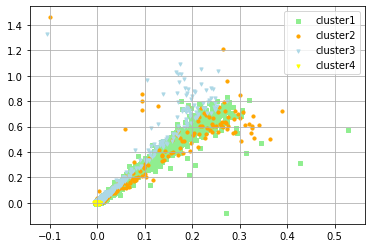

In [155]:
plt.scatter(X[y_km==0,0],X[y_km==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[y_km==3,0],X[y_km==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[y_km==4,0],X[y_km==4,1],c='red',marker='v',s=10 , label='cluster5')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',marker='*',s=30 , label='center cluster')

plt.legend()
plt.grid(True)
plt.show()

In [156]:
len(temp_cluster_result[temp_cluster_result['cluster']==0]) # 비즈

10110

In [157]:
len(temp_cluster_result[temp_cluster_result['cluster']==1]) # 가격, 거래소, 돈

1106

In [158]:
len(temp_cluster_result[temp_cluster_result['cluster']==2]) # 기술

1928

In [159]:
len(temp_cluster_result[temp_cluster_result['cluster']==3]) # 비즈

95

In [161]:
temp_cluster_result['category'] = 1 # 1 영문뉴스, 2 국문뉴스 , 3 twitter
temp_cluster_result.loc[temp_cluster_result['cluster']==0,'label'] = 7 # 비즈
temp_cluster_result.loc[temp_cluster_result['cluster']==1,'label'] = 12 #  가격, 거래소, 돈
temp_cluster_result.loc[temp_cluster_result['cluster']==2,'label'] = 9 # 기술발전
temp_cluster_result.loc[temp_cluster_result['cluster']==3,'label'] = 7 # 비즈

In [162]:
from sklearn import cluster
from sklearn import metrics
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [163]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [164]:
kmeans.inertia_

1027.1715884489022

In [165]:
print ("Cluster id labels for inputted data")
print (labels)

Cluster id labels for inputted data
[1 3 1 ... 0 0 0]


In [166]:
cluster_values= list(model.wv.vocab)

In [167]:
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))

Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-1027.1716


In [168]:
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')

In [170]:
print ("Silhouette_score: ")
print (silhouette_score)

Silhouette_score: 
0.7476496


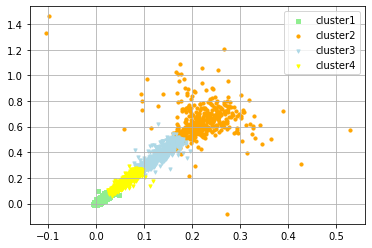

In [171]:
kmeans_label = kmeans.labels_

plt.scatter(X[kmeans_label==0,0],X[kmeans_label==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[kmeans_label==1,0],X[kmeans_label==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[kmeans_label==2,0],X[kmeans_label==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[kmeans_label==3,0],X[kmeans_label==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[kmeans_label==4,0],X[kmeans_label==4,1],c='red',marker='v',s=10 , label='cluster5')

plt.legend()
plt.grid(True)
plt.show()

In [172]:
temp_cluster_result1 = pd.DataFrame(columns=temp_heder)
temp_cluster_result1['word'] = list(model.wv.vocab)
temp_cluster_result1['cluster'] = kmeans_label

In [173]:
#temp_cluster_result1[temp_cluster_result1['cluster']==0].head(30) #시도 및 혼돈  # 혼란 부정적 
temp_cluster_result1['raw_data'] = X.tolist()

In [174]:
temp_cluster_result1['centroid'] = temp_cluster_result1['cluster'].apply(lambda x : centroids[x])

In [175]:
euclidean_centroid_list = []
for euclidean_centroid in temp_cluster_result1['centroid'] :
    euclidean_centroid_list.append(euclidean_centroid.tolist())

In [176]:
temp_distance1 = pairwise_distances(X,euclidean_centroid_list, metric='euclidean')

In [177]:
import scipy.spatial.distance as dist

In [178]:
temp_cluster_result1['distance'] = temp_cluster_result1.apply(lambda x : dist.euclidean(x.raw_data,x.centroid),axis=1)

In [179]:
temp_cluster_result1['tfidf'] = tf_idf_value
temp_cluster_result1['score'] = temp_cluster_result1.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result1

In [ ]:
temp_cluster_result1[temp_cluster_result1['cluster']==0].sort_values('score',ascending=False).nsmallest(30,'score') # 인플 

In [181]:
temp_cluster_result1[temp_cluster_result1['cluster']==1].sort_values('score',ascending=False).nsmallest(40,'score') # 긍정

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
1682,"[0.21707412600517273, 0.6423009037971497, -0.1...",free,1,"[0.21802995, 0.63682365, -0.15408333, -0.40774...",0.105565,0.015102,1.090462,NaN
700,"[0.21903321146965027, 0.6236333847045898, -0.1...",right,1,"[0.21802995, 0.63682365, -0.15408333, -0.40774...",0.128851,0.019276,1.109576,NaN
991,"[0.2212565690279007, 0.6273486614227295, -0.14...",hand,1,"[0.21802995, 0.63682365, -0.15408333, -0.40774...",0.137702,0.013314,1.124388,NaN
576,"[0.2137574851512909, 0.6277903914451599, -0.13...",clear,1,"[0.21802995, 0.63682365, -0.15408333, -0.40774...",0.146785,0.018183,1.128602,NaN
1458,"[0.22333720326423645, 0.654459536075592, -0.15...",full,1,"[0.21802995, 0.63682365, -0.15408333, -0.40774...",0.149973,0.015500,1.134473,NaN
355,"[0.2392657846212387, 0.6418073773384094, -0.15...",course,1,"[0.21802995, 0.63682365, -0.15408333, -0.40774...",0.155813,0.015997,1.139816,NaN
375,"[0.23623491823673248, 0.6298475861549377, -0.1...",leave,1,"[0.21802995, 0.63682365, -0.15408333, -0.40774...",0.168186,0.014010,1.154176,NaN
549,"[0.22344160079956055, 0.6165915131568909, -0.1...",bring,1,"[0.21802995, 0.63682365, -0.15408333, -0.40774...",0.172398,0.018083,1.154315,NaN
310,"[0.20931430160999298, 0.6262111067771912, -0.1...",involve,1,"[0.21802995, 0.63682365, -0.15408333, -0.40774...",0.180908,0.018977,1.161930,NaN
3022,"[0.23502810299396515, 0.5921890139579773, -0.1...",forbes,1,"[0.21802995, 0.63682365, -0.15408333, -0.40774...",0.178154,0.014407,1.163747,NaN


In [182]:
temp_cluster_result1[temp_cluster_result1['cluster']==2].sort_values('score',ascending=False).nsmallest(30,'score')  # 비즈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
3159,"[0.1338043212890625, 0.3678256869316101, -0.09...",insight,2,"[0.12803861, 0.3686031, -0.08862221, -0.240467...",0.058652,0.005564,1.053088,NaN
2296,"[0.12898972630500793, 0.37427398562431335, -0....",stream,2,"[0.12803861, 0.3686031, -0.08862221, -0.240467...",0.060871,0.005663,1.055208,NaN
5205,"[0.127666637301445, 0.3619678020477295, -0.085...",morgan,2,"[0.12803861, 0.3686031, -0.08862221, -0.240467...",0.062001,0.004968,1.057033,NaN
413,"[0.1328006088733673, 0.35963308811187744, -0.0...",friend,2,"[0.12803861, 0.3686031, -0.08862221, -0.240467...",0.064421,0.004968,1.059453,NaN
1386,"[0.13307635486125946, 0.3734443485736847, -0.0...",failure,2,"[0.12803861, 0.3686031, -0.08862221, -0.240467...",0.064279,0.004570,1.059708,NaN
1773,"[0.13277988135814667, 0.38184016942977905, -0....",enough,2,"[0.12803861, 0.3686031, -0.08862221, -0.240467...",0.065951,0.006160,1.059791,NaN
707,"[0.12110500782728195, 0.36849701404571533, -0....",sort,2,"[0.12803861, 0.3686031, -0.08862221, -0.240467...",0.071281,0.006657,1.064624,NaN
924,"[0.12165813148021698, 0.3579450845718384, -0.0...",catch,2,"[0.12803861, 0.3686031, -0.08862221, -0.240467...",0.075716,0.005465,1.070251,NaN
2544,"[0.1328035145998001, 0.37390995025634766, -0.0...",researcher,2,"[0.12803861, 0.3686031, -0.08862221, -0.240467...",0.075719,0.004372,1.071347,NaN
3475,"[0.12834787368774414, 0.36315667629241943, -0....",emphasize,2,"[0.12803861, 0.3686031, -0.08862221, -0.240467...",0.079103,0.005365,1.073738,NaN


In [188]:
temp_cluster_result1[temp_cluster_result1['cluster']==3].sort_values('score',ascending=False).nsmallest(30,'score') # 이슈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
3429,"[0.05325666442513466, 0.15275608003139496, -0....",flat,3,"[0.05399045, 0.15351757, -0.036879964, -0.1006...",0.031818,0.001292,1.030526,NaN
3448,"[0.05521079897880554, 0.15492136776447296, -0....",counterfeit,3,"[0.05399045, 0.15351757, -0.036879964, -0.1006...",0.032295,0.001689,1.030605,NaN
1115,"[0.05640251561999321, 0.15507164597511292, -0....",accuse,3,"[0.05399045, 0.15351757, -0.036879964, -0.1006...",0.032539,0.001689,1.030850,NaN
2242,"[0.05822085961699486, 0.15258657932281494, -0....",jones,3,"[0.05399045, 0.15351757, -0.036879964, -0.1006...",0.033146,0.001391,1.031755,NaN
11744,"[0.054280661046504974, 0.1552443951368332, -0....",porn,3,"[0.05399045, 0.15351757, -0.036879964, -0.1006...",0.033406,0.001391,1.032015,NaN
736,"[0.0535646416246891, 0.15444278717041016, -0.0...",stress,3,"[0.05399045, 0.15351757, -0.036879964, -0.1006...",0.035285,0.001788,1.033497,NaN
3362,"[0.05235223472118378, 0.15741465985774994, -0....",tiny,3,"[0.05399045, 0.15351757, -0.036879964, -0.1006...",0.035651,0.001689,1.033962,NaN
1638,"[0.055942222476005554, 0.1582156866788864, -0....",exception,3,"[0.05399045, 0.15351757, -0.036879964, -0.1006...",0.036825,0.001987,1.034838,NaN
370,"[0.05745714157819748, 0.15373557806015015, -0....",repeat,3,"[0.05399045, 0.15351757, -0.036879964, -0.1006...",0.036860,0.001888,1.034972,NaN
8036,"[0.0544087216258049, 0.15095190703868866, -0.0...",transactional,3,"[0.05399045, 0.15351757, -0.036879964, -0.1006...",0.037520,0.001689,1.035831,NaN


In [184]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==0]) # 인플

10603

In [185]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==1]) # 긍정

460

In [186]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==2]) # 비즈

617

In [187]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==3]) # 사회문제

1559

In [189]:
temp_cluster_result1['category'] = 1 # 1 영문뉴스, 2 국문뉴스 , 3 twitter
temp_cluster_result1.loc[temp_cluster_result1['cluster']==0,'label'] = 6 # 인플루언서
temp_cluster_result1.loc[temp_cluster_result1['cluster']==1,'label'] = 1 # 긍정
temp_cluster_result1.loc[temp_cluster_result1['cluster']==2,'label'] = 7 # 비즈
temp_cluster_result1.loc[temp_cluster_result1['cluster']==3,'label'] = 5 # 사회문제

In [190]:
temp_cluster_result1['result'] = 1 # 1 상승 2 하락 3 보합
temp_cluster_result['result'] = 1
temp_cluster_result1['Silhouette'] = 0.7476496# 1 상승 2 하락 3 보합
temp_cluster_result['Silhouette'] = 0.7476496
 

In [191]:
temp_cluster_result1.to_csv("../cluster/en_news/2017_up2/en_news_2017_up2_euclidean.csv")
temp_cluster_result.to_csv("../cluster/en_news/2017_up2/en_news_2017_up2_cosine.csv")

In [89]:
word_vectors = model.wv

In [90]:
vocabs = word_vectors.vocab.keys()

In [91]:
word_vector_list = [word_vectors[v]for v in vocabs]

In [92]:
print(word_vectors.similarity(w1='little',w2='push'))

0.9975371


In [93]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xys = pca.fit_transform(word_vector_list)

In [94]:
xys

array([[ 3.87471521e+00, -1.75495902e-01],
       [ 1.00407367e+00,  1.69811810e-01],
       [ 4.69512291e+00, -8.58722987e-01],
       ...,
       [-5.00168069e-01,  7.71329622e-04],
       [-5.14019541e-01, -4.33095707e-04],
       [-5.31075348e-01,  6.73185406e-03]])

In [95]:
xys[:,0]

array([ 3.87471521,  1.00407367,  4.69512291, ..., -0.50016807,
       -0.51401954, -0.53107535])

In [96]:
xys[:,1]

array([-1.75495902e-01,  1.69811810e-01, -8.58722987e-01, ...,
        7.71329622e-04, -4.33095707e-04,  6.73185406e-03])

In [97]:
xs = xys[:,0]
ys = xys[:,1]

In [98]:
def plot_2d_graph(vocabs,xs,ys) :
    plt.figure(figsize=(8,6))
    plt.scatter(xs,ys,marker='o')
    for i,v in enumerate(vocabs) :
        plt.annotate(v,xy=(xs[i],ys[i]))

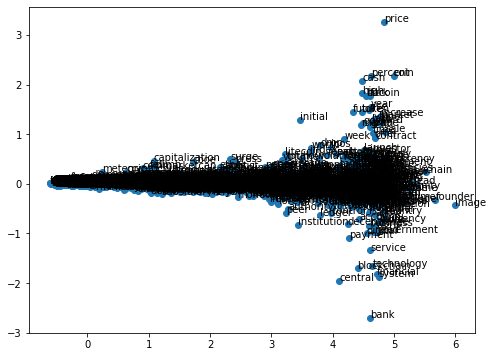

In [99]:
plot_2d_graph(vocabs,xs,ys)

In [100]:
nltk.help.upenn_tagset

<function nltk.help.upenn_tagset(tagpattern=None)>